# Geodesic Demo

First, we import the necessary modules.

In [1]:
%load_ext autoreload
%autoreload 2

from fadge import GRRT
from jax   import numpy as np

from matplotlib import pyplot as plt
from itertools  import product

We then instasize `PRay` into an object

In [2]:
grrt = GRRT(aspin=0, atol=1e-3, rtol=0, names={'ind':'lambda'})

Radius of outer event horizon: 2.0


To setup the initial conditions, we first set the camera location, and then specify the image.

In [3]:
grrt.set_cam(10, 60, 0)
grrt.set_image(16, 32)
# grrt.set_image(6, 32, alpha0 = 5)
print('Array shape of the initial conditions:', grrt._ic.shape)

Array shape of the initial conditions: (2, 4, 32, 32)


To performm geodesic integration, simply call `pray.geode()`.
When no argument is specified, the integration is carried out to `-2 * r_obs`.
The return values are the full steps during the integration.

In [4]:
l, f = grrt.geode() # full step output

# fx = f[:,0,1]
# fy = f[:,0,2]
# fz = f[:,0,3]

r = f[:,0,1]
theta = f[:,0,2]
phi = f[:,0,3]

fx = ( r * np.cos(phi) + 0.9375 * np.sin(phi) ) * np.sin(theta)
fy = ( r * np.cos(phi) - 0.9375 * np.sin(phi) ) * np.sin(theta)
fz = r * np.cos(theta)

jit(masked_do); input: Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[2,4,32,32])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float32[])>with<DynamicJaxprTrace(level=0/1)> [Traced<ShapedArray(float32[2,4,32,32])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,32,32])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,32,32])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,32,32])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,32,32])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,32,32])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float32[2,4,32,32])>with<DynamicJaxprTrace(level=0/1)>]


100%|████████| 100/100 [00:02<00:00, 29.01it/s, lambda=-20.0, dlambda=-0.181   ]


target = -20 exceeded; SKIP


In [5]:
print(f.shape)

(441, 2, 4, 32, 32)


Because `PRay` uses `XAJ` for solving ODEs, it supports dense output.
We can put a lot of sampling points near the black hole for better visualization of the geodeiscs.

In [6]:
l = np.linspace(-10100,-9900,201)
i = grrt.geode(l) # interpolate using dense output


ix = i[:,0,1]
iy = i[:,0,2]
iz = i[:,0,3]


100%|███| 100/100 [00:00<00:00, 218.56it/s, lambda=-1.22e+04, dlambda=-2.88e+03]


target = -10100.0 exceeded; SKIP


We are finally ready to plot the results.

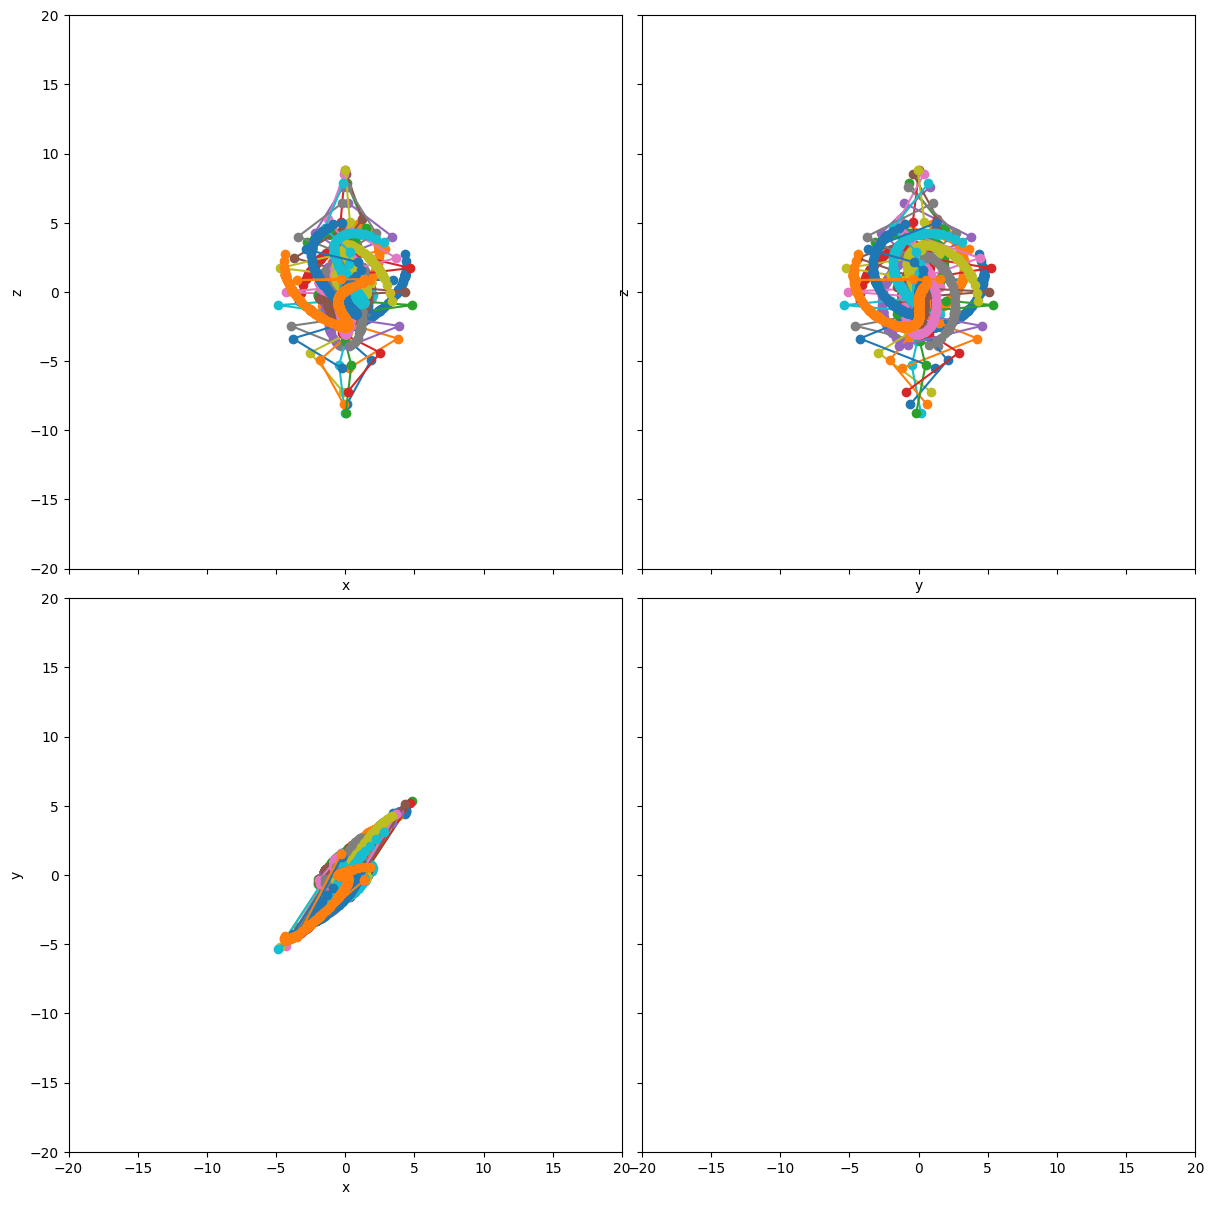

In [7]:
fig, axes = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)

for i,j in product(range(32), range(15,16)):
    axes[0][0].plot(fx[:,i,j], fz[:,i,j], '-o', color=f'C{i}')
    axes[0][1].plot(fy[:,i,j], fz[:,i,j], '-o', color=f'C{i}')
    axes[1][0].plot(fx[:,i,j], fy[:,i,j], '-o', color=f'C{i}')
    # axes[0][0].scatter(ix[:,i,j], iz[:,i,j], s=1, color=f'C{i}')
    # axes[0][1].scatter(iy[:,i,j], iz[:,i,j], s=1, color=f'C{i}')
    # axes[1][0].scatter(ix[:,i,j], iy[:,i,j], s=1, color=f'C{i}')

fig.tight_layout()

ax = axes[0][0]
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')

ax = axes[0][1]
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')

ax = axes[1][0]
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')

ax = axes[1][1]
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_aspect('equal')

Here we zoom in and show only the geodesics that reach the horizon.

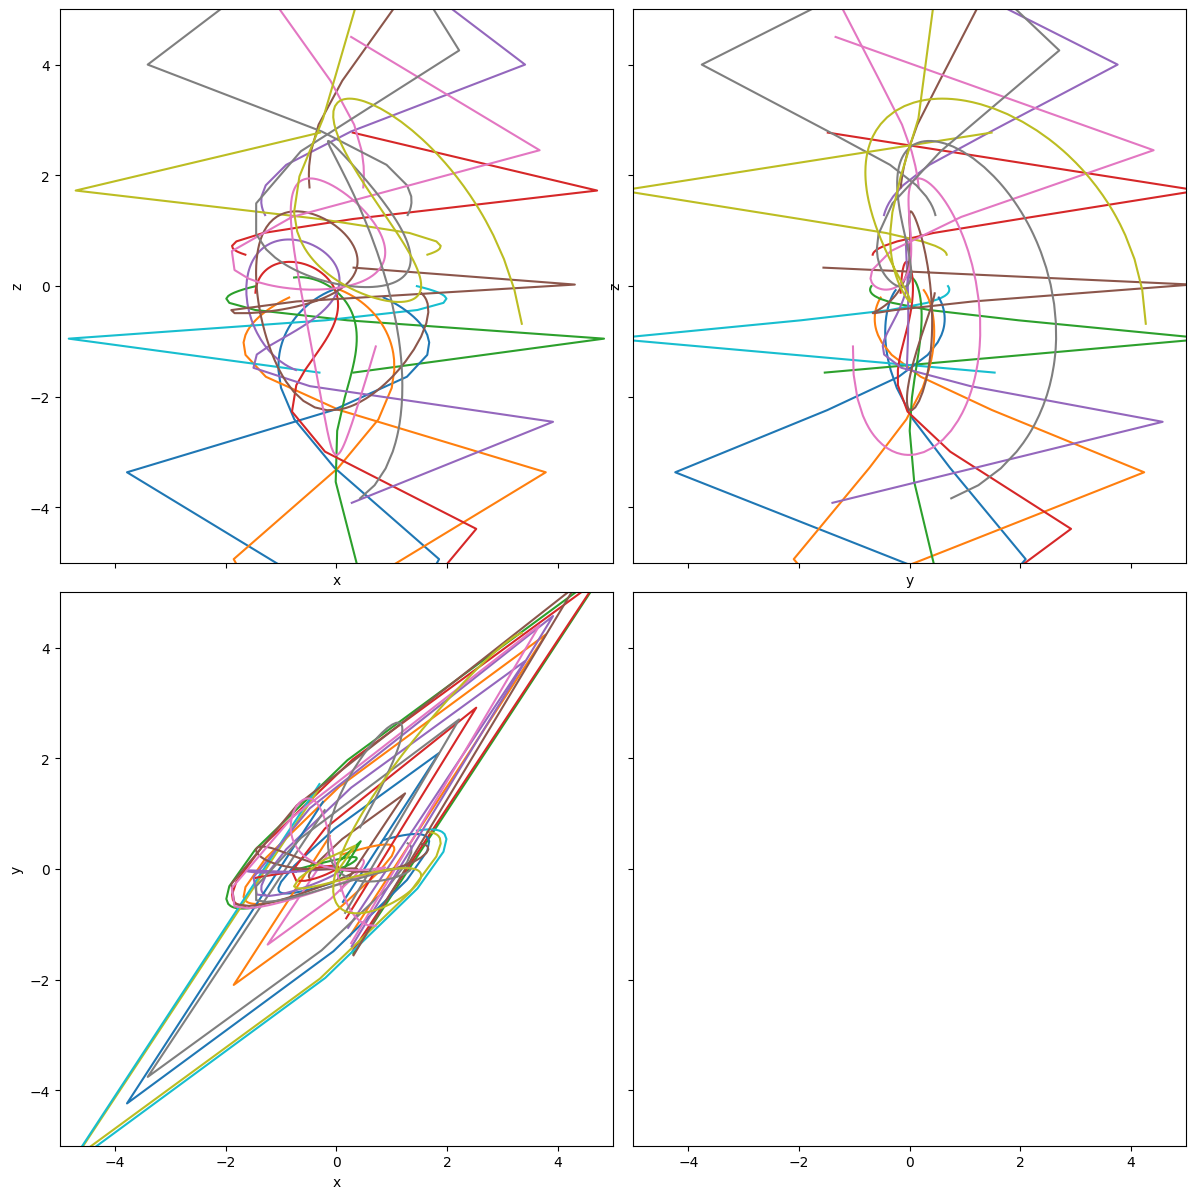

In [8]:
fig, axes = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)

for i,j in product(range(10,29), range(15,16)):
    axes[0][0].plot(fx[:,i,j], fz[:,i,j], '-', color=f'C{i}')
    axes[0][1].plot(fy[:,i,j], fz[:,i,j], '-', color=f'C{i}')
    axes[1][0].plot(fx[:,i,j], fy[:,i,j], '-', color=f'C{i}')

fig.tight_layout()

ax = axes[0][0]
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_aspect('equal')

ax = axes[0][1]
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_aspect('equal')

ax = axes[1][0]
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_aspect('equal')

ax = axes[1][1]
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_aspect('equal')